In [26]:
from mot_analysis.motimg import MOTImaging
# blue mot tof flight measurement
import os
import glob
import h5py
import json
import matplotlib.pyplot as plt
import numpy as np
import datetime
from matplotlib.animation import FuncAnimation, FFMpegWriter


MovieWriter imagemagick unavailable; using Pillow instead.


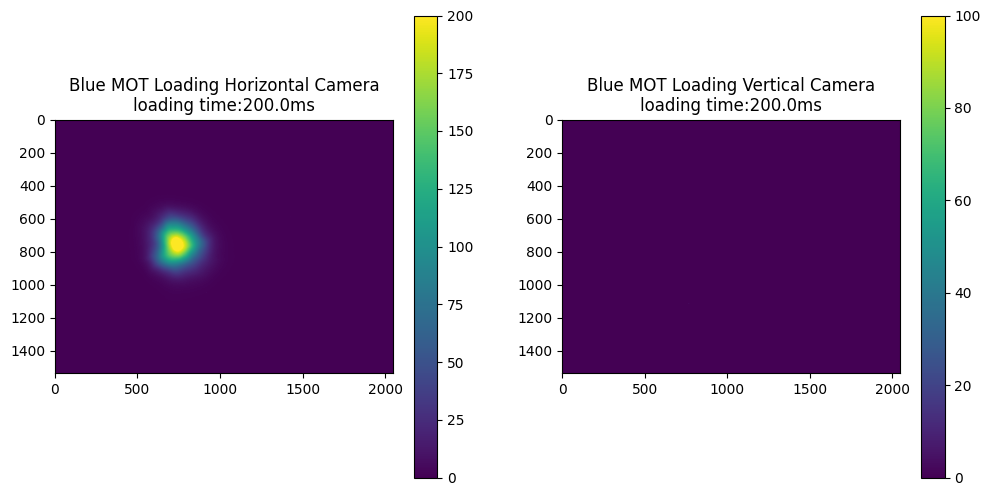

In [35]:
import os
import glob
import json
import h5py
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, FFMpegWriter

folder_path = r"Z:\AION\Data\2024\10\11\blue_ramping_time_data"

# Get a list of all HDF5 files in the directory
h5_files = glob.glob(os.path.join(folder_path, '*.h5'))

# Sort files by modification time to ensure they are in the correct order
h5_files.sort(key=os.path.getmtime)

# Initialize lists to store data and parameters
horiz_data_list = []
vert_data_list = []
imaging_time_list = []

# Iterate over each HDF5 file and extract data
for file_path in h5_files:
    with h5py.File(file_path, 'r') as f:
        blue_mot_data_horiz = f['horizontal camera blue mot'][:]
        blue_mot_data_vert = f['vertical camera blue mot'][:]
        parameters = json.loads(f['parameters'][()])
        imaging_time = parameters["blue_phase_ramping"]["blue_phase_ramping_duration"]

        horiz_data_list.append(blue_mot_data_horiz)
        vert_data_list.append(blue_mot_data_vert)
        imaging_time_list.append(imaging_time)

# Sort the lists by the order of the time_of_flights list
sorted_lists = sorted(zip(imaging_time_list, horiz_data_list, vert_data_list))
imaging_time_list, horiz_data_list, vert_data_list = zip(*sorted_lists)

# Create a figure and axis for the animation
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Initialize the images
im_horiz = ax[0].imshow(horiz_data_list[0], vmin=0, vmax=200, aspect='equal')
im_vert = ax[1].imshow(vert_data_list[0], vmin=0, vmax=100, aspect='equal')
ax[0].set_title('Blue MOT Loading Horizontal Camera' +
                f'\nloading time:{round(imaging_time_list[0], 5) * 1e3}ms')
ax[1].set_title('Blue MOT Loading Vertical Camera' +
                f'\nloading time:{round(imaging_time_list[0], 5) * 1e3}ms')

fig.colorbar(im_horiz, ax=ax[0])
fig.colorbar(im_vert, ax=ax[1])

# Function to update the animation
def update(frame):
    im_horiz.set_data(horiz_data_list[frame])
    im_vert.set_data(vert_data_list[frame])
    # Update the color scale
    v_max_horiz = round(horiz_data_list[frame].max() * 1e-2, 2) * 1e2 + 10
    v_max_vert = round(vert_data_list[frame].max() * 1e-2, 2) * 1e2 + 10
    im_horiz.set_clim(vmin=0, vmax=200)
    im_vert.set_clim(vmin=0, vmax=100)
    ax[0].set_title('Blue MOT Loading Horizontal Camera' +
                    f'\nloading time:{round(imaging_time_list[frame], 5) * 1e3}ms')
    ax[1].set_title('Blue MOT Loading Vertical Camera' +
                    f'\nloading time:{round(imaging_time_list[frame], 5) * 1e3}ms')
    return im_horiz, im_vert

# Create the animation
ani = FuncAnimation(fig, update, frames=len(horiz_data_list), blit=True, repeat=False,
                    interval=200)  # Interval in milliseconds

# Save the animation as a video file (optional)
ani.save('blue_mot_capture_process.gif', writer='imagemagick', fps=2)

# Show the animation
plt.show()

In [34]:
imaging_time_list

[0.17,
 0.12,
 0.01,
 0.15000000000000002,
 0.03,
 0.060000000000000005,
 0.04,
 0.08,
 0.13,
 0.06999999999999999,
 0.19,
 0.18000000000000002,
 0.05,
 0.09999999999999999,
 0.11,
 0.16,
 0.02,
 0.14,
 0.09,
 0.2]

In [7]:
folder_path = r"Z:\AION\Data\2024\10\11\blue_ramping_capture_data"

# Get a list of all HDF5 files in the directory
h5_files = glob.glob(os.path.join(folder_path, '*.h5'))

# Sort files by modification time to ensure they are in the correct order
h5_files.sort(key=os.path.getmtime)

# Initialize lists to store data and parameters
horiz_data_list = []
vert_data_list = []
imaging_time_list = []

# Iterate over each HDF5 file and extract data
for file_path in h5_files:
    with h5py.File(file_path, 'r') as f:
        blue_mot_data_horiz = f['horizontal camera blue mot'][:]
        blue_mot_data_vert = f['vertical camera blue mot'][:]
        parameters = json.loads(f['parameters'][()])
        imaging_time = parameters["blue_phase_ramping_duration"]


    horiz_data_list.append(blue_mot_data_horiz)
    vert_data_list.append(blue_mot_data_vert)
    imaging_time_list.append(imaging_time)

# Sort the lists by the order of the time_of_flights list
sorted_lists = sorted(zip(imaging_time_list, horiz_data_list, vert_data_list))
imaging_time_list, horiz_data_list, vert_data_list = zip(*sorted_lists)

# Convert back to lists
imaging_time_list = list(imaging_time_list)
horiz_data_list = list(horiz_data_list)
vert_data_list = list(vert_data_list)

# Create a figure and axis for the animation
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Initialize the images
im_horiz = ax[0].imshow(horiz_data_list[0], vmin=0, vmax=200, aspect='equal')
im_vert = ax[1].imshow(vert_data_list[0], vmin=0, vmax=100, aspect='equal')
ax[0].set_title('Blue MOT Loading Horizontal Camera'+
                f'\nloading time:{round(imaging_time_list[0],5)*1e3}ms')
ax[1].set_title('Blue MOT Loading Vertical Camera'+
                f'\nloading time:{round(imaging_time_list[0],5)*1e3}ms')
               
fig.colorbar(im_horiz, ax=ax[0])
fig.colorbar(im_vert, ax=ax[1])

# Function to update the animation
def update(frame):
    im_horiz.set_data(horiz_data_list[frame])
    im_vert.set_data(vert_data_list[frame])
    # Update the color scale
    v_max_horiz = round(horiz_data_list[frame].max()*1e-2, 2)*1e2+10
    v_max_vert = round(vert_data_list[frame].max()*1e-2, 2)*1e2+10
    im_horiz.set_clim(vmin=0, vmax=200)
    im_vert.set_clim(vmin=0, vmax=100)
    ax[0].set_title('Blue MOT Loading Horizontal Camera'+
                f'\nloading time:{round(imaging_time_list[frame],5)*1e3}ms')
    ax[1].set_title('Blue MOT Loading Vertical Camera'+
                    f'\nloading time:{round(imaging_time_list[frame],5)*1e3}ms')
    return im_horiz, im_vert

# Create the animation
ani = FuncAnimation(fig, update, frames=len(horiz_data_list), blit=True, repeat=False,
                    interval=200)  # Interval in milliseconds

# Save the animation as a video file (optional)
ani.save('blue_mot_capture_process.mp4', writer='ffmpeg')

# Show the animation
plt.show()

ValueError: not enough values to unpack (expected 3, got 0)

# Import and fit the 2D gaussian width

[214.5455393827777, 219.19469891878796, 224.77884588845825, 231.38816519138913, 239.18693324192745, 247.89241069138387, 258.0151559975385, 268.97076338571674, 281.2549335725618, 294.38225307359, 307.7210371876486, 322.0959827589248, 335.3537269432733, 359.87205789525456, 367.51330858010675, 377.20908473254843, 400.7689134601306, 412.2075027777808]
[352.04031131749633, 355.6682518414497, 357.3526861206467, 358.0614634343745, 356.1347661027148, 346.05032505834845, 343.4338949133957, 338.8749078723375, 329.6573299576509, 322.67191949080075, 311.9347742703996, 313.64740480989485, 309.85999551083376, 298.2657371704427, 255.95481210924282, 217.3772984014761, 236.57342634205725, 216.31653074757907]


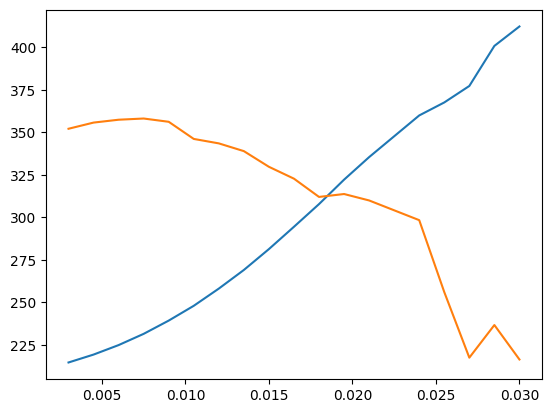

In [8]:
folder_path = r"Z:\AION\Data\2024\10\08\bb_tof_351peak"

# Get a list of all HDF5 files in the directory
h5_files = glob.glob(os.path.join(folder_path, '*.h5'))

# Sort files by modification time to ensure they are in the correct order
h5_files.sort(key=os.path.getmtime)

horiz_data_list = []
vert_data_list = []
time_of_flights = []

# Iterate over each HDF5 file and extract data
for file_path in h5_files:
    with h5py.File(file_path, 'r') as f:
        mot_tof_data_horiz = f['horizontal camera red mot'][:]
        mot_tof_data_vert = f['vertical camera red mot'][:]
        parameters = json.loads(f['parameters'][()])
        time_of_flight = parameters["sequence_parameters"]["time_of_flight"]
    if np.sum(mot_tof_data_horiz) > 1e5 and np.sum(mot_tof_data_vert) > 1e5:
        horiz_data_list.append(mot_tof_data_horiz)
        vert_data_list.append(mot_tof_data_vert)
        time_of_flights.append(time_of_flight)

# Sort the lists by the order of the time_of_flights list
sorted_lists = sorted(zip(time_of_flights, horiz_data_list, vert_data_list))
time_of_flights, horiz_data_list, vert_data_list = zip(*sorted_lists)

# Convert back to lists
time_of_flights = list(time_of_flights)
horiz_data_list = list(horiz_data_list)
vert_data_list = list(vert_data_list)
gaussian_widths_horiz = []
gaussian_widths_vert = []
for i in range(len(horiz_data_list)):
    mot_imaging_horiz = MOTImaging(horiz_data_list[i])
    gaussian_width_horiz = abs(mot_imaging_horiz.fit_2d_gaussian()[3])
    mot_imaging_vert = MOTImaging(vert_data_list[i])
    gaussian_width_vert = abs(mot_imaging_vert.fit_2d_gaussian()[3])

    gaussian_widths_horiz.append(gaussian_width_horiz)
    gaussian_widths_vert.append(gaussian_width_vert)

plt.plot(time_of_flights, gaussian_widths_horiz, label='Horizontal')    
plt.plot(time_of_flights, gaussian_widths_vert, label='Vertical')
print(gaussian_widths_horiz)
print(gaussian_widths_vert)
    
    

# Save the data calculated in the previous step

In [9]:
time_of_flights_store = time_of_flights
gaussian_widths_horiz_store = gaussian_widths_horiz
gaussian_widths_vert_store = gaussian_widths_vert
# store the data
# Get the current datetime
now = datetime.datetime.now()
# Format the datetime as a string
datetime_string = now.strftime("%Y_%m_%d_%H_%M_%S")
saving_name = "data/"+ datetime_string + "_mot_data.npz"
np.savez(saving_name, time_of_flights=time_of_flights_store, gaussian_widths_horiz=gaussian_widths_horiz_store, gaussian_widths_vert=gaussian_widths_vert_store)

FileNotFoundError: [Errno 2] No such file or directory: 'data/2024_10_11_17_23_37_mot_data.npz'

In [10]:
# load the data
data = np.load(r"data\2024_10_08_23_16_58_mot_data.npz")
time_of_flights = data['time_of_flights']
gaussian_widths_horiz = data['gaussian_widths_horiz']
gaussian_widths_vert = data['gaussian_widths_vert']
time_of_flights_store = time_of_flights
gaussian_widths_horiz_store = gaussian_widths_horiz
gaussian_widths_vert_store = gaussian_widths_vert

FileNotFoundError: [Errno 2] No such file or directory: 'data\\2024_10_08_23_16_58_mot_data.npz'

# Fit the Horizontal data

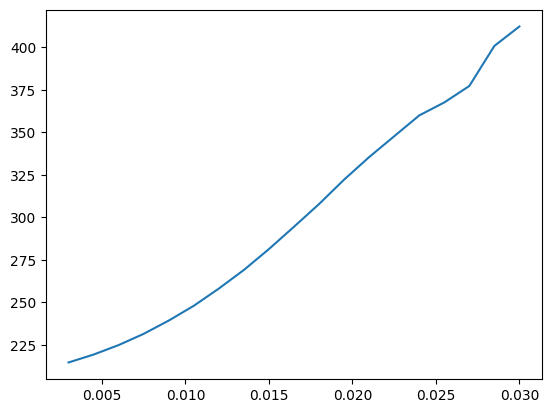

In [11]:
# exclude the points that are too big in gaussian_widths_horiz and update time_of flights
# find the index of the elements that are bigger than 2000 in gaussian_widths_horiz
index = [i for i, x in enumerate(gaussian_widths_horiz) if abs(x) >= 2000]
gaussian_widths_horiz = [x for x in gaussian_widths_horiz if abs(x) < 2000]
time_of_flights = [x for i, x in enumerate(time_of_flights) if i not in index]
plt.plot(time_of_flights, gaussian_widths_horiz, label='Horizontal')    

temperature:5.1949922291232617e-05
r0:0.0025770112565707136


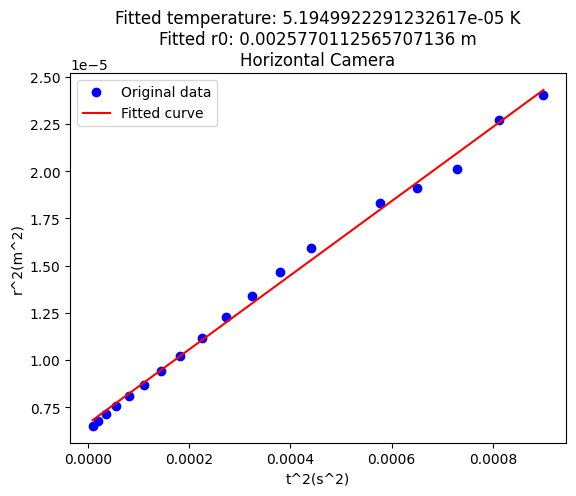

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Constants
Mass = 88*1.66e-27 # mass of Sr
K_B = 1.38e-23  # Boltzmann constant

# Sample data (replace with your actual data)
time_of_flights = time_of_flights_store # example time of flights
gaussian_widths_horiz = gaussian_widths_horiz_store # example gaussian widths

tsquares = np.array(time_of_flights)**2
rsquares = (np.array(gaussian_widths_horiz)*3.45e-6/0.58*2)**2

# Define the fitting function
# 4kBt^2 = m(r(t)^2 - r0^2)
def fitting_function(tsquare, gradient, b):
    return gradient * tsquare + b

# Perform the curve fitting
params, covariance = curve_fit(fitting_function, tsquares, rsquares)

# Extract the fitted parameters
gradient_fit, b_fit = params
temperature = gradient_fit * Mass / (4 * K_B)
r0 = np.sqrt(b_fit)
print(f'temperature:{temperature}')
print(f'r0:{r0}')
# Generate fitted data
fitted_rsquares = fitting_function(tsquares, gradient_fit, b_fit)

# Plot the original data and the fitted curve
plt.plot(tsquares, rsquares, 'bo', label='Original data')
plt.plot(tsquares, fitted_rsquares, 'r-', label='Fitted curve')
plt.title(f'Fitted temperature: {temperature} K'+
          f'\nFitted r0: {r0} m'+
          f'\nHorizontal Camera')
plt.xlabel('t^2(s^2)')
plt.ylabel('r^2(m^2)')
plt.legend()
plt.show()


# Vertical Data

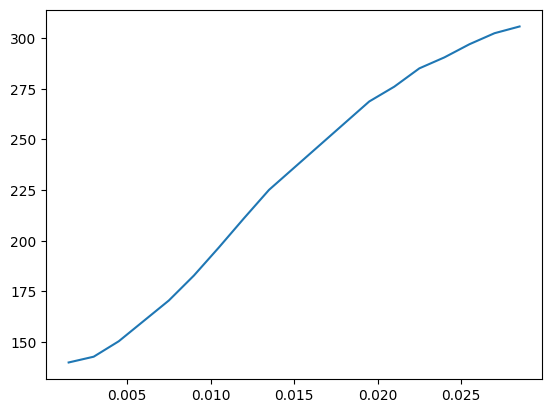

In [87]:
# exclude the points that are too big in gaussian_widths_horiz and update time_of flights
# find the index of the elements that are bigger than 2000 in gaussian_widths_horiz
index = [i for i, x in enumerate(gaussian_widths_vert_store) if abs(x) >= 2000]
gaussian_widths_vert = [x for x in gaussian_widths_vert_store if abs(x) < 2000]
time_of_flights = [x for i, x in enumerate(time_of_flights_store) if i not in index]
plt.plot(time_of_flights, gaussian_widths_vert, label='vertical')    

4.8637336936183607e-05
0.0022323296673828867


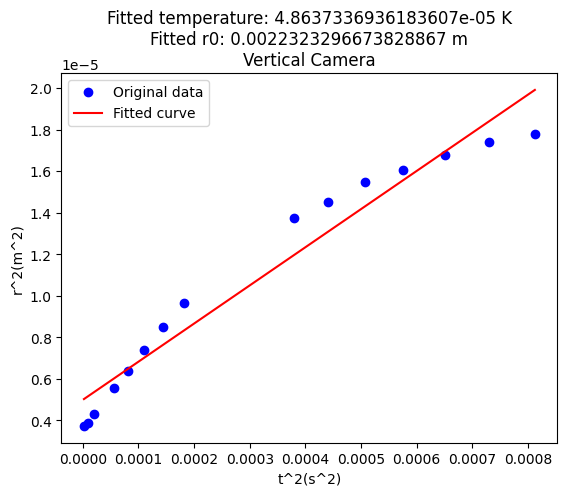

In [89]:
# do fitting for vertical
gaussian_widths_vert = gaussian_widths_vert[:15]
time_of_flights = time_of_flights[:15]
tsquares = np.array(time_of_flights)**2
rsquares = (np.array(gaussian_widths_vert)*3.45e-6/0.5*2)**2
params, covariance = curve_fit(fitting_function, tsquares, rsquares)
gradient_fit, b_fit = params
temperature = gradient_fit * Mass / (4 * K_B)
r0 = np.sqrt(b_fit)
print(temperature)
print(r0)
# Generate fitted data
fitted_rsquares = fitting_function(tsquares, gradient_fit, b_fit)

# Plot the original data and the fitted curve
plt.plot(tsquares, rsquares, 'bo', label='Original data')
plt.plot(tsquares, fitted_rsquares, 'r-', label='Fitted curve')
plt.title(f'Fitted temperature: {temperature} K'+
          f'\nFitted r0: {r0} m'
          f'\nVertical Camera')
plt.xlabel('t^2(s^2)')
plt.ylabel('r^2(m^2)')
plt.legend()
plt.show()
